## Photon bunches stored via IACT output (blue: Cherenkov, red: fluorescence)
 - Shower impact point is always (0, 0)

## Requirements
Install **eventio** package ([pyeventio](https://github.com/fact-project/pyeventio)) to run this notebook.

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from eventio import IACTFile
%matplotlib inline  

# Vertical showers

In [ ]:
# Perpendicular projection
circle1 = plt.Circle((0, -8485), 750, color='black', fill=False)
circle2 = plt.Circle((8485, 0), 750, color='black', fill=False)
circle3 = plt.Circle((0, 8485), 750, color='black', fill=False)
circle4 = plt.Circle((-8485, 0), 750, color='black', fill=False)

projected_radius = 8.250000E+02

# Projection according to shower direction
proj_circle1 = plt.Circle((0, -8485), projected_radius, color='gray', fill=False)
proj_circle2 = plt.Circle((8485, 0), projected_radius, color='gray', fill=False)
proj_circle3 = plt.Circle((0, 8485), projected_radius, color='gray', fill=False)
proj_circle4 = plt.Circle((-8485, 0), projected_radius, color='gray', fill=False)

circles = [circle1, circle2, circle3, circle4,
           proj_circle1, proj_circle2, proj_circle3, proj_circle4]

telescope_positions = np.array([[0., -8485.],
                                [8485., 0.],
                                [0., 8485.],
                                [-8485., 0.]])

file_name="data/run2_1TeV50sh0deg/iact_2.dat"

fig, ax = plt.subplots(figsize=(15, 15))
ax.set_aspect(1)
ax.set_xlabel('x [cm]')
ax.set_ylabel('y [cm]')

with IACTFile(file_name) as f:
    print(f)
    for n in range(len(f)):
        event = f[n]
        for itel, position in zip(event.photon_bunches, telescope_positions):
            
            f_photons = event.photon_bunches[itel][event.photon_bunches[itel]['photons'] < 0]
            c_photons = event.photon_bunches[itel][event.photon_bunches[itel]['photons'] > 0]
            
            ax.scatter(
                x=f_photons['x'] + position[0],
                y=f_photons['y'] + position[1],
                c='r',
                s=10,
                alpha=0.7,
                lw=0,
            )
            
            ax.scatter(
                x=c_photons['x'] + position[0],
                y=c_photons['y'] + position[1],
                c='b',
                s=5,
                alpha=0.01,
                lw=0,
            )

# Shower impact point at observation level            
ax.plot([0, 0], 'xk', markersize=20, lw=4)            
            
# Plot grid and projections of the telescopes:
grid_x_low = -10000
grid_x_high = 10000
grid_y_low = -10000
grid_y_high = 10000

ax.axvline(grid_x_low, color="green")
ax.axvline(grid_x_high, color="green")
ax.axhline(grid_y_low, color="green")
ax.axhline(grid_y_high, color="green")

for i in range(20):
    ax.axvline(grid_x_low + 1000 * i, color="green", alpha=0.3)
    ax.axhline(grid_y_low + 1000 * i, color="green", alpha=0.3)

for circle in circles:
    ax.add_artist(circle)
    
ax.fill([grid_x_low, grid_x_high, grid_x_high, grid_x_low],
        [grid_y_low, grid_y_low, grid_y_high, grid_y_high],
        'green', alpha=0.1)

# Grid elements containing the telescope shadow
ax.fill([-1000, 1000, 1000, -1000],
        [-10000, -10000, -7000, -7000],
        'green', alpha=0.25)
ax.fill([-1000, 1000, 1000, -1000],
        [10000, 10000, 7000, 7000],
        'green', alpha=0.25)
ax.fill([-10000, -10000, -7000, -7000],
        [-1000, 1000, 1000, -1000],
        'green', alpha=0.25)
ax.fill([10000, 10000, 7000, 7000],
        [-1000, 1000, 1000, -1000],
        'green', alpha=0.25)


IACTFile(
  path=data/run2_1TeV50sh0deg/iact_2.dat
  n_telescopes=4
  n_events=50
)


 - Red points: projection of fluorescence photon bunches at observation level.
 - Blue points: projection of Cherenkov photon bunches at observation level.
 - Black circumference: perpendicular projection of sphere keeping its original radius
 - Gray circumference: telescope shadow considering the shower direction.
 - In this case, the grid consists of 10x10 m^2 grid elements as defined in *iact.c*.
 - The size of the entire grid is the one provided by the debugging IACT info. 

# Vertical showers

#### To our understanding (based basically on the documentation), only those bunches hitting a grid element containing part of the projected shadow of a sphere should be stored. This is not what we see here for fluorescence bunches, right? We checked that all stored bunches actually pass through the spheres.

![alt text](images/iact3d.png "CORSIKA IACT photon bunch selection")

#### Besides, given the direction of the shower and the telescope layout we'd have expected more fluorescence photon bunches on the opposite side (for each telescope) as most bunches come from regions close the shower axis. However, the way in which fluorescence bunches are distributed on ground indicates that they are being mostly emitted from outer towards the shower core part, contrary to expectations. Any idea why this is happening?


# Inclined showers (Zd: 50 deg)

IACTFile(
  path=data/run1_1TeV50sh50deg/iact_1.dat
  n_telescopes=4
  n_events=50
)


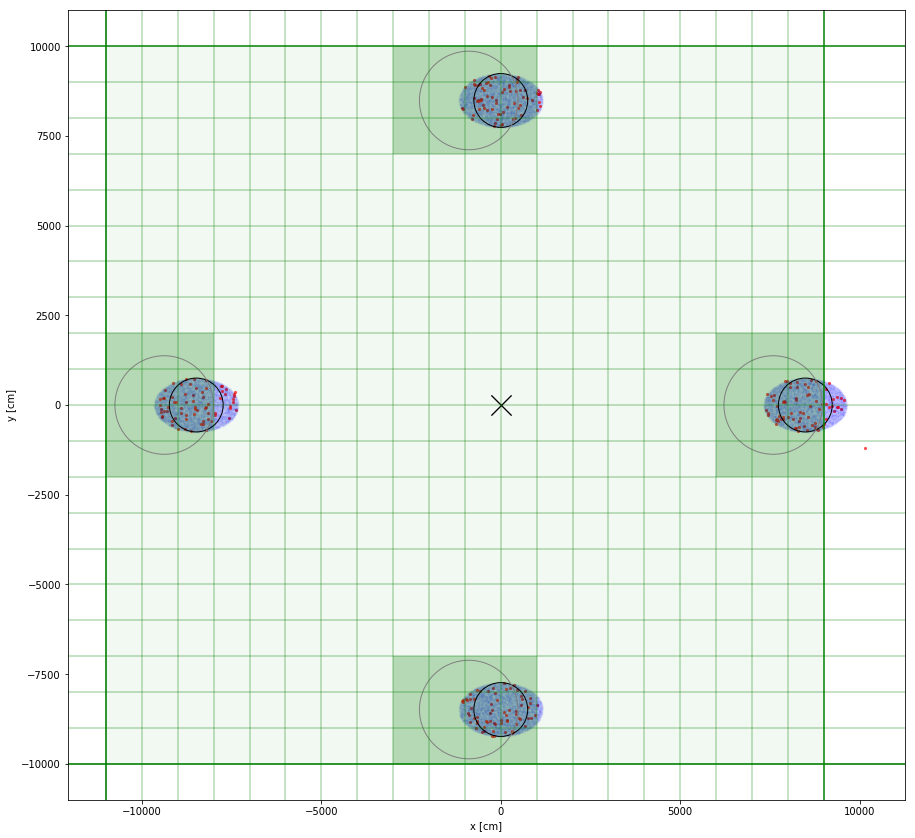

In [33]:
# Perpendicular projection
circle1 = plt.Circle((0, -8485), 750, color='black', fill=False)
circle2 = plt.Circle((8485, 0), 750, color='black', fill=False)
circle3 = plt.Circle((0, 8485), 750, color='black', fill=False)
circle4 = plt.Circle((-8485, 0), 750, color='black', fill=False)

projected_radius = 1.372854E+03

# Projection according to shower direction
proj_circle1 = plt.Circle((-8.938152E+02, -8.485000E+03), projected_radius, color='gray', fill=False)
proj_circle2 = plt.Circle((7.591185E+03, -7.813981E-05), projected_radius, color='gray', fill=False)
proj_circle3 = plt.Circle((-8.938152E+02, 8.485000E+03), projected_radius, color='gray', fill=False)
proj_circle4 = plt.Circle((-9.378815E+03, -7.813981E-05), projected_radius, color='gray', fill=False)

circles = [circle1, circle2, circle3, circle4,
           proj_circle1, proj_circle2, proj_circle3, proj_circle4]

telescope_positions = np.array([[0., -8485.],
                                [8485., 0.],
                                [0., 8485.],
                                [-8485., 0.]])

file_name="data/run1_1TeV50sh50deg/iact_1.dat"

fig, ax = plt.subplots(figsize=(15, 15))
ax.set_aspect(1)
ax.set_xlabel('x [cm]')
ax.set_ylabel('y [cm]')

with IACTFile(file_name) as f:
    print(f)
    for n in range(len(f)):
        event = f[n]
        for itel, position in zip(event.photon_bunches, telescope_positions):
            
            f_photons = event.photon_bunches[itel][event.photon_bunches[itel]['photons'] < 0]
            c_photons = event.photon_bunches[itel][event.photon_bunches[itel]['photons'] > 0]
            
            ax.scatter(
                x=f_photons['x'] + position[0],
                y=f_photons['y'] + position[1],
                c='r',
                s=10,
                alpha=0.7,
                lw=0,
            )
            
            ax.scatter(
                x=c_photons['x'] + position[0],
                y=c_photons['y'] + position[1],
                c='b',
                s=5,
                alpha=0.01,
                lw=0,
            )
        
# Shower impact point at observation level            
ax.plot([0, 0], 'xk', markersize=20, lw=4) 
            
# Plot grid and projections of the telescopes:
grid_x_low = -11000
grid_x_high = 9000
grid_y_low = -10000
grid_y_high = 10000

ax.axvline(grid_x_low, color="green")
ax.axvline(grid_x_high, color="green")
ax.axhline(grid_y_low, color="green")
ax.axhline(grid_y_high, color="green")

for i in range(20):
    ax.axvline(grid_x_low + 1000 * i, color="green", alpha=0.3)
    ax.axhline(grid_y_low + 1000 * i, color="green", alpha=0.3)

for circle in circles:
    ax.add_artist(circle)
    
ax.fill([grid_x_low, grid_x_high, grid_x_high, grid_x_low],
        [grid_y_low, grid_y_low, grid_y_high, grid_y_high],
        'green', alpha=0.05)

# Grid elements containing the telescope shadow
ax.fill([-3000, 1000, 1000, -3000],
        [-10000, -10000, -7000, -7000],
        'green', alpha=0.25)
ax.fill([-3000, 1000, 1000, -3000],
        [10000, 10000, 7000, 7000],
        'green', alpha=0.25)
ax.fill([-11000, -11000, -8000, -8000],
        [-2000, 2000, 2000, -2000],
        'green', alpha=0.25)
ax.fill([9000, 9000, 6000, 6000],
        [-2000, 2000, 2000, -2000],
        'green', alpha=0.25)


 - Red points: projection of fluorescence photon bunches at observation level.
 - Blue points: projection of Cherenkov photon bunches at observation level.
 - Black circumference: perpendicular projection of sphere keeping its original radius
 - Gray circumference: telescope shadow considering the shower direction.
 - In this case, the grid consists of 10x10 m^2 grid elements as defined in *iact.c*.
 - The size of the entire grid is the one provided by the debugging IACT info. 

# Inclined showers (Zd: 50 deg)

#### In these case, where the shadows of the projected spheres are larger, even some Cherenkov bunches end up outside the grid elements that contain the telescope shadows. Note that for the telescope on the right, Cherenkov photon bunches are even outside the grid. Moreover, Cherenkov elliptical shadow should be placed in the middle of the telescope shadow. 

#### Unlike before, now fluorescence and Cherenkov photon bunches seem to be distributed in the same way.